In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/normalized_dry_bean_dataset.csv')
df.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,Class
0,0.034053,0.058574,0.044262,0.152142,0.122612,0.549812,0.033107,0.070804,0.025360,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0.980620,SEKER
1,0.035500,0.077557,0.030479,0.178337,0.051577,0.411785,0.034991,0.073577,0.027797,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0.974979,SEKER
2,0.038259,0.068035,0.052633,0.158190,0.131521,0.562727,0.037126,0.078816,0.027085,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0.987196,SEKER
3,0.040940,0.082942,0.048548,0.177691,0.091623,0.498616,0.041389,0.083854,0.027640,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0.893675,SEKER
4,0.041504,0.065313,0.032862,0.200679,0.025565,0.333680,0.040123,0.084906,0.026475,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0.989116,SEKER


C:\Users\thanh\AppData\Local\Temp\ipykernel_4092\3878041540.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


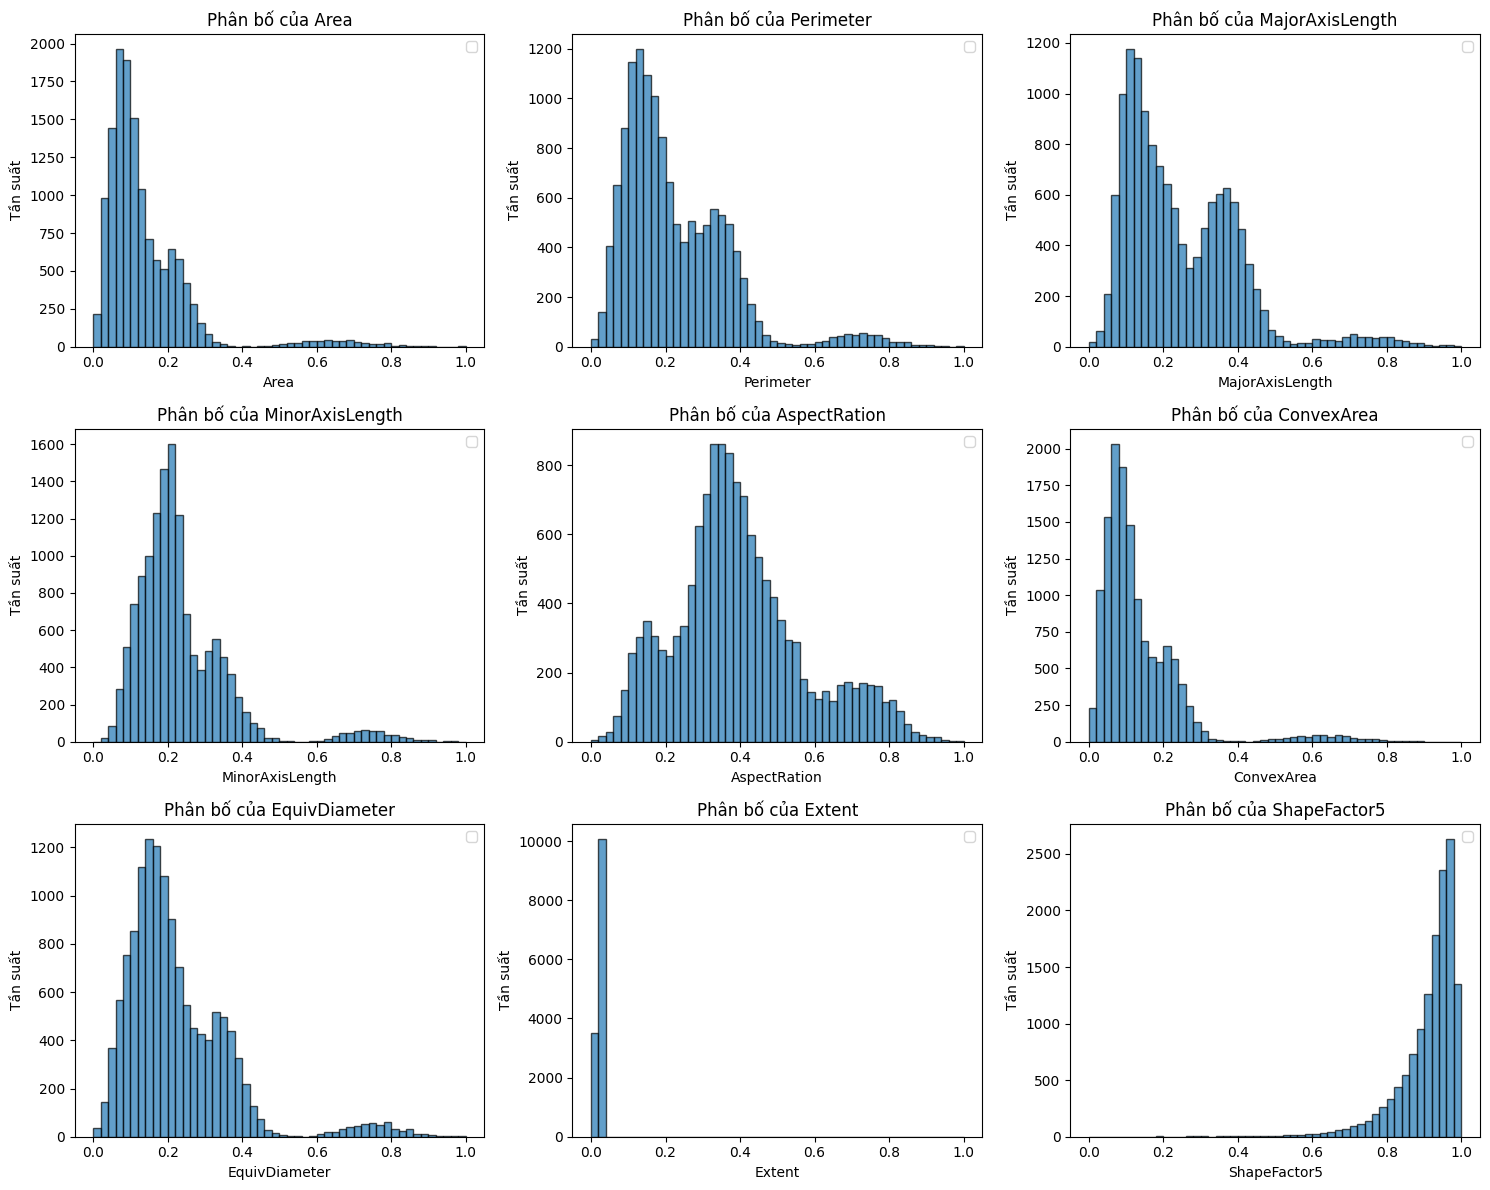

In [4]:
try:
    df = pd.read_csv("./data/normalized_dry_bean_dataset.csv")
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file 'Dry_Bean_Dataset2025.csv'. Vui lòng kiểm tra lại đường dẫn.")
    # Tạo DataFrame giả định nếu file không tồn tại để demo code
    data = {
        'Area': np.random.normal(loc=50000, scale=10000, size=100),
        'Perimeter': np.random.uniform(low=500, high=1000, size=100),
        'MajorAxisLength': np.random.normal(loc=300, scale=50, size=100),
        'MinorAxisLength': np.random.normal(loc=200, scale=50, size=100),
        'AspectRation': np.random.uniform(low=1, high=3, size=100),
        'ConvexArea': np.random.normal(loc=50000, scale=10000, size=100),
        'EquivDiameter': np.random.normal(loc=250, scale=40, size=100),
        'Extent': np.random.uniform(low=0.5, high=0.9, size=100),
        'ShapeFactor5': np.random.uniform(low=1.8, high=2.2, size=100)
    }
    df = pd.DataFrame(data)


# Chọn các cột số (liên tục) để trực quan hóa
numeric_cols = [
    'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 
    'AspectRation', 'ConvexArea', 'EquivDiameter', 'Extent', 'ShapeFactor5'
]

# Thiết lập kích thước đồ thị (4 hàng, 3 cột để chứa 9 biểu đồ)
plt.figure(figsize=(15, 12)) 

# Lặp qua các cột và vẽ Histogram
for i, col in enumerate(numeric_cols):
    # Tạo lưới 3x3 hoặc 4x3 (4, 3) để hiển thị đẹp hơn
    plt.subplot(3, 3, i + 1)
    
    # *** Đảm bảo trục X tự động điều chỉnh ***
    # plt.hist() TỰ ĐỘNG LÀM ĐIỀU NÀY KHI KHÔNG CÓ tham số 'range'
    plt.hist(df[col], bins=50, edgecolor='black', alpha=0.7) # Giảm bins xuống 50 hoặc 30
    
    plt.title(f'Phân bố của {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Tần suất', fontsize=10)
    
    # Nếu bạn muốn thêm đường biểu diễn (ví dụ: giá trị trung bình)
    mean_val = df[col].mean()
    # plt.axvline(mean_val, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_val:.2f}')
    plt.legend()


plt.tight_layout()
plt.show()

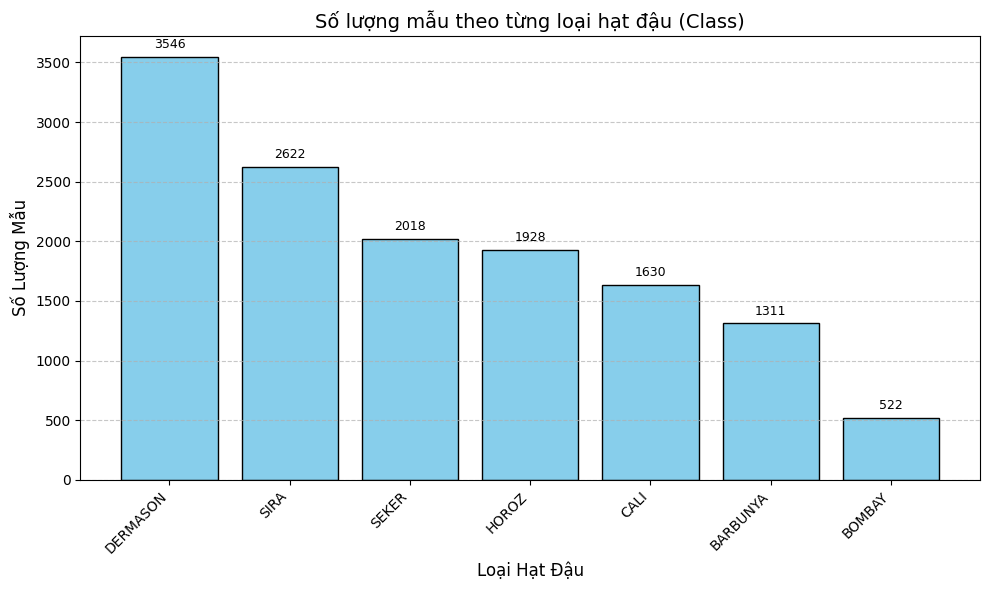

In [5]:
df = pd.read_csv('./data/normalized_dry_bean_dataset.csv')

class_counts = df['Class'].value_counts()

plt.figure(figsize=(10, 6))

bars = plt.bar(class_counts.index, class_counts.values, color='skyblue', edgecolor='black')

plt.title('Số lượng mẫu theo từng loại hạt đậu (Class)', fontsize=14)
plt.xlabel('Loại Hạt Đậu', fontsize=12)
plt.ylabel('Số Lượng Mẫu', fontsize=12)
plt.xticks(rotation=45, ha='right') 

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

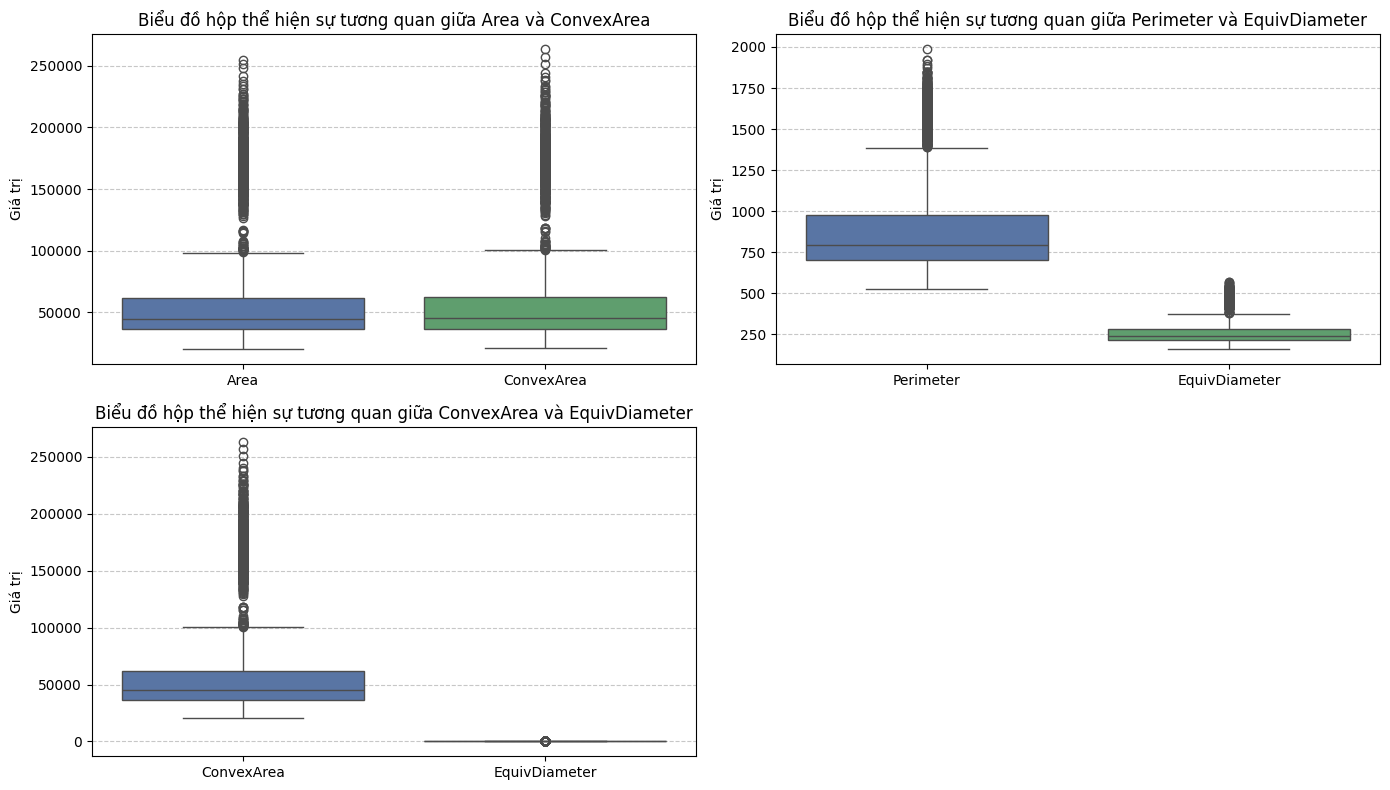

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/Dry_Bean_Dataset2025.csv')

pairs = [
    ("Area", "ConvexArea"),
    ("Perimeter", "EquivDiameter"),
    ("ConvexArea", "EquivDiameter")
]

colors = ["#4C72B0", "#55A868"]

plt.figure(figsize=(14, 8))

for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df[[x, y]], palette=colors)
    plt.title(f"Biểu đồ hộp thể hiện sự tương quan giữa {x} và {y}")
    plt.ylabel("Giá trị")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
